# Reconocedor de animales domésticos (perros y gatos)

Vamos a desarrollar una red que reconozca perros y gatos. Para ello, vamos a utilizar un dataset contenido en nuestra cuenta de Google Drive. Antes, debemos montar nuestro sistema de archivos de Google Drive para hacerlo accesible desde este *notebook*. Google nos solicitará permiso, tenemos que copiar y pegar el código que nos suministra.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Ahora ya es accesible

¿Estoy realmente utilizando una GPU? Compruébalo en **Editar / Configuración del cuaderno** o **Entorno de ejecuación / Cambiar tipo de entorno de ejecución**

dogs_and_cats


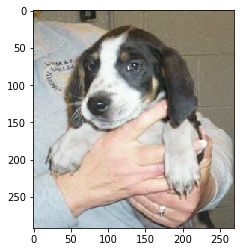

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/FSI_Dataset_pets"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/FSI_Dataset_pets/dogs_and_cats/train/dogs/dog.10.jpg', 'r')
imshow(np.asarray(pil_im))



In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Primer modelo

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/Colab Notebooks/FSI_Dataset_pets/dogs_and_cats/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/FSI_Dataset_pets/dogs_and_cats/validation'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
##model.add(Dropout(0.25))
model.add(Flatten())
##model.add(Dense(128, activation='relu'))
##model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 10


h=model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=800,
    
    
)



Found 2000 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 677s 7s/step - loss: 0.7002 - acc: 0.5515 - val_loss: 0.6596 - val_acc: 0.5888
Epoch 2/10
100/100 [==============================] - 113s 1s/step - loss: 0.6519 - acc: 0.6150 - val_loss: 0.6454 - val_acc: 0.5978
Epoch 3/10
100/100 [==============================] - 114s 1s/step - loss: 0.6291 - acc: 0.6570 - val_loss: 0.6071 - val_acc: 0.6647
Epoch 4/10
100/100 [==============================] - 111s 1s/step - loss: 0.5768 - acc: 0.7130 - val_loss: 0.5554 - val_acc: 0.7255
Epoch 5/10
100/100 [==============================] - 111s 1s/step - loss: 0.5584 - acc: 0.7145 - val_loss: 0.7018 - val_acc: 0.6038
Epoch 6/10
100/100 [==============================] - 111s 1s/step - loss: 0.5421 - acc: 0.7315 - val_loss: 0.5303 - val_acc: 0.7265
Epoch 7/10
100/100 [==============================] - 109s 1s/step - loss: 0.5150 - acc: 0.7530 - val_loss: 0.5499 - v